Importing pandas ; Importing seaborn ; Importing monthly progress prediction by book value

In [7]:
import pandas as pd
import seaborn as sns
df_progress=pd.read_csv('../data/output/monthly-progress-by-book-value.csv',sep=';')


Visualizing monthly progress across years with iqr

<Axes: xlabel='Month', ylabel='Progress'>

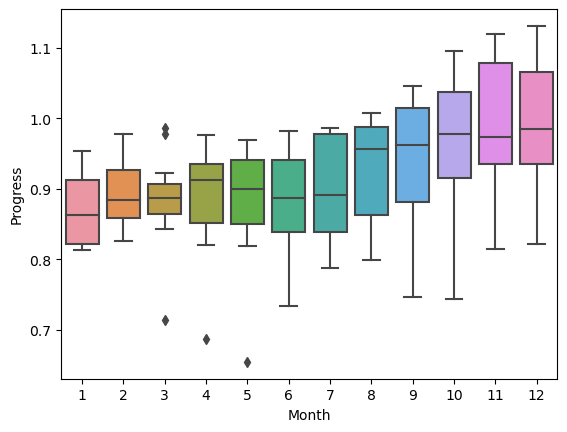

In [8]:
sns.boxplot(x='Month', y='Progress', data=df_progress)

Calculating the lower bound and upper bound of the IQR

In [9]:
months = range(1, 13)

lower_bound = []
upper_bound = []

print(df_progress.head(len(df_progress)))
for month in months:
    q1 = df_progress[df_progress['Month'] == month]['Progress'].quantile(0.25)
    q3 = df_progress[df_progress['Month'] == month]['Progress'].quantile(0.75)
    iqr = q3 - q1
    lower_bound.append(q1 - 1.5 * iqr)
    upper_bound.append(q3 + 1.5 * iqr)

     Year  Month         Close  Progress
0    2014      1   1954.750000  0.825127
1    2014      2   2047.000000  0.864067
2    2014      3   2102.750000  0.887600
3    2014      4   2199.285714  0.928349
4    2014      5   2234.722222  0.943307
..    ...    ...           ...       ...
120  2024      1   9576.136364  0.930610
121  2024      2   9819.444444  0.954254
122  2024      3  10056.944444  0.977334
123  2024      4   9682.812500  0.940976
124  2024      5   9655.000000  0.938273

[125 rows x 4 columns]


Removing outlier from each progress outliers from each month

<Axes: xlabel='Month', ylabel='Progress'>

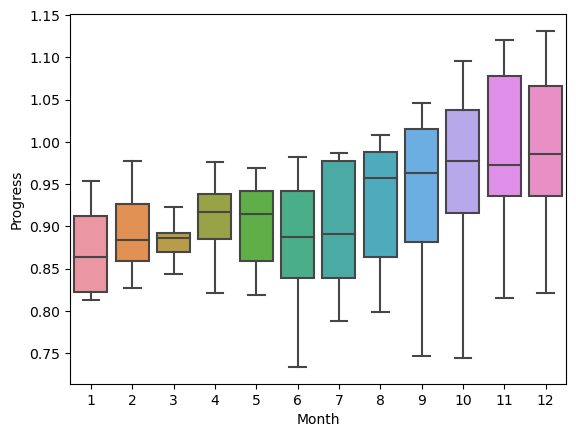

In [10]:
df_filtered_progress=pd.DataFrame()

for month in months:
    df_filtered_progress=pd.concat([df_filtered_progress,df_progress[(df_progress['Month'] == month) & (df_progress['Progress'] >= lower_bound[month-1]) & (df_progress['Progress'] <= upper_bound[month-1])]])

sns.boxplot(x='Month', y='Progress', data=df_filtered_progress)

Dropping the year column ; Calculating progress mean on months

In [11]:
df_filtered_progress=df_filtered_progress.drop(columns=['Year','Close']).groupby(['Month']).mean()
print(df_filtered_progress.head(len(df_filtered_progress)))

       Progress
Month          
1      0.871269
2      0.891620
3      0.881210
4      0.906517
5      0.900617
6      0.881482
7      0.897911
8      0.927292
9      0.932053
10     0.959443
11     0.979435
12     0.990799


Exporting the monthly progress mean to scv

In [12]:
df_filtered_progress.to_csv('../data/output/monthly-progress-by-book-value.csv',sep=';')